# Dataset

In [1]:
# Imports
import torch
import torchvision
import numpy as np

from torchvision.datasets import MNIST
dataset = MNIST(root='data/', download=True)

In [2]:
print('length of dataset:', len(dataset))

dataset[1][0]

length of dataset: 60000


Label: 5
Label: 0
Label: 4
Label: 1


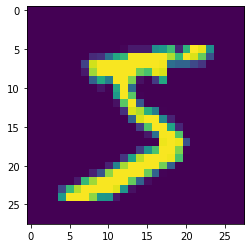

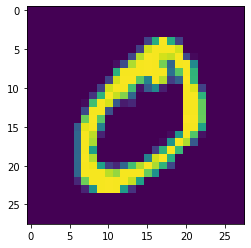

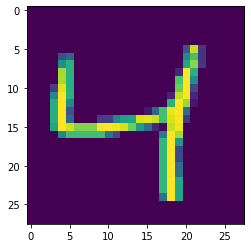

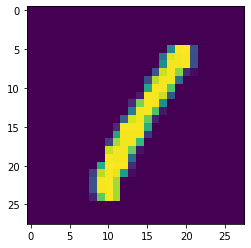

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

for i in range(len(dataset)):
    plt.figure()
    image, label = dataset[i]
    image = np.asarray(image)
    plt.plot(image.shape[0], image.shape[1])
    # plt.imshow(image, cmap='gray')
    print('Label:', label)
    
    if i == 3:
        break        
    plt.imshow(image)
    
plt.imshow(image)

In [4]:
import torchvision.transforms as transforms

# get transformed data 
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())

tensor shape: torch.Size([1, 28, 28])


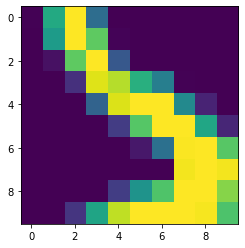

In [5]:
img_tensor, label = dataset[0]

print('tensor shape:',img_tensor.shape)

plt.imshow(img_tensor[0,10:20, 10:20])

# Train Test splitting

In [6]:
from torch.utils.data import random_split

train, val = random_split(dataset, [50000, 10000])
print('len train:', len(train))
print('len val:', len(val))

len train: 50000
len val: 10000


In [7]:
from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(train, batch_size, shuffle = True)
val_dataloader = DataLoader(val, batch_size)

# Untrained Model

In [8]:
import torch.nn as nn

input_size = 28*28

num_classes = 10

# MNIST kế thừa linear -> model.weight, model.bias thành model.linear.weight, model.linear.bias   
class MINIST_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MINIST_model()

In [9]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)

torch.Size([10, 784])
torch.Size([10])


In [10]:
for imgs, labels in train_dataloader:
    print(imgs.shape)
    outputs = model(imgs)
    break

print(outputs.shape)
print(outputs[:2].data)

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([[-0.0332, -0.1337,  0.0835, -0.1986, -0.2375,  0.0220, -0.1868, -0.0285,
          0.0963,  0.1327],
        [-0.2175, -0.1043,  0.1627,  0.1308, -0.2421, -0.0285, -0.0018,  0.4550,
         -0.0252,  0.5070]])


In [11]:
import torch.nn.functional as F

# Calculate softmax
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1007, 0.0911, 0.1132, 0.0854, 0.0821, 0.1064, 0.0864, 0.1012, 0.1146,
         0.1189],
        [0.0732, 0.0820, 0.1071, 0.1037, 0.0714, 0.0884, 0.0908, 0.1434, 0.0887,
         0.1511]])
Sum:  1.0000001192092896


In [12]:
# Max probabilities of prediction
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 7, 3, 7, 7, 3, 3, 3, 7, 2, 9, 7, 7, 7, 9, 7, 7, 7, 5, 7, 7, 7, 7,
        7, 5, 7, 3, 3, 7, 7, 9, 5, 9, 7, 7, 7, 5, 7, 7, 5, 2, 5, 7, 2, 7, 9, 7,
        7, 7, 7, 7, 5, 7, 7, 9, 9, 9, 2, 7, 3, 9, 7, 7, 7, 7, 7, 3, 3, 7, 7, 7,
        9, 7, 2, 7, 7, 9, 7, 7, 5, 9, 7, 3, 2, 7, 3, 5, 7, 7, 7, 3, 7, 2, 7, 3,
        7, 9, 3, 1, 2, 3, 7, 7, 3, 3, 7, 5, 7, 9, 7, 7, 9, 7, 7, 7, 7, 2, 3, 7,
        7, 2, 3, 7, 7, 7, 7, 7])
tensor([0.1189, 0.1511, 0.1213, 0.1354, 0.1274, 0.1616, 0.1576, 0.1434, 0.1555,
        0.1947, 0.1372, 0.1758, 0.1368, 0.1256, 0.1495, 0.1332, 0.1473, 0.1643,
        0.1467, 0.1160, 0.1278, 0.1655, 0.1234, 0.1505, 0.1525, 0.1408, 0.1483,
        0.1239, 0.1223, 0.1317, 0.1562, 0.1293, 0.1483, 0.1420, 0.1699, 0.1529,
        0.1341, 0.1191, 0.1296, 0.1264, 0.1201, 0.1332, 0.1416, 0.1584, 0.1300,
        0.1569, 0.1299, 0.1633, 0.1269, 0.1555, 0.1318, 0.1368, 0.1310, 0.1370,
        0.1238, 0.1181, 0.1333, 0.1333, 0.1471, 0.1397, 0.1411, 0.1395, 0.1255,
       

In [13]:
labels

tensor([4, 6, 2, 0, 1, 8, 8, 0, 0, 3, 7, 6, 1, 5, 3, 4, 0, 9, 9, 6, 5, 3, 1, 7,
        0, 4, 8, 0, 9, 1, 3, 3, 9, 5, 3, 5, 1, 1, 1, 1, 1, 9, 4, 3, 7, 8, 8, 3,
        6, 7, 5, 6, 6, 0, 4, 4, 7, 9, 7, 0, 0, 3, 1, 5, 5, 5, 0, 7, 5, 3, 2, 5,
        5, 1, 9, 2, 3, 6, 1, 3, 9, 1, 3, 0, 2, 4, 3, 7, 2, 8, 5, 0, 5, 7, 2, 6,
        0, 4, 7, 6, 7, 6, 8, 2, 0, 0, 2, 7, 3, 3, 2, 9, 5, 3, 4, 1, 0, 7, 5, 6,
        3, 9, 2, 0, 3, 2, 2, 3])

# Loss calculation (cross entropy) and optimization (with SGD - Adam - AdamW)
```
for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection
```

In [14]:
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3541, grad_fn=<NllLossBackward>)


In [15]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [16]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

def evaluate(model, val_dataloader):
    outputs = [model.validation_step(batch) for batch in val_dataloader]
    return model.validation_epoch_end(outputs)

In [17]:
class MNIST_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
            nn.Linear(input_size, num_classes),
            )
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MNIST_model()

In [18]:
evaluate(model, val_dataloader)

{'val_loss': 2.3138065338134766, 'val_acc': 0.07891613990068436}

In [19]:
# With SGD optimizer
his = fit(35, 0.001, model, train_dataloader, val_dataloader)

Epoch [0], val_loss: 1.9447, val_acc: 0.6466
Epoch [1], val_loss: 1.6756, val_acc: 0.7449
Epoch [2], val_loss: 1.4742, val_acc: 0.7732
Epoch [3], val_loss: 1.3222, val_acc: 0.7903
Epoch [4], val_loss: 1.2053, val_acc: 0.7996
Epoch [5], val_loss: 1.1136, val_acc: 0.8105
Epoch [6], val_loss: 1.0400, val_acc: 0.8159
Epoch [7], val_loss: 0.9797, val_acc: 0.8209
Epoch [8], val_loss: 0.9296, val_acc: 0.8264
Epoch [9], val_loss: 0.8872, val_acc: 0.8303
Epoch [10], val_loss: 0.8508, val_acc: 0.8340
Epoch [11], val_loss: 0.8193, val_acc: 0.8374
Epoch [12], val_loss: 0.7917, val_acc: 0.8405
Epoch [13], val_loss: 0.7673, val_acc: 0.8438
Epoch [14], val_loss: 0.7456, val_acc: 0.8470
Epoch [15], val_loss: 0.7261, val_acc: 0.8487
Epoch [16], val_loss: 0.7085, val_acc: 0.8511
Epoch [17], val_loss: 0.6925, val_acc: 0.8526
Epoch [18], val_loss: 0.6779, val_acc: 0.8539
Epoch [19], val_loss: 0.6645, val_acc: 0.8560
Epoch [20], val_loss: 0.6521, val_acc: 0.8576
Epoch [21], val_loss: 0.6407, val_acc: 0.858

In [23]:
# With Adam optimizer
his_adam = fit(35, 0.001, model, train_dataloader, val_dataloader, opt_func=torch.optim.Adam)

Epoch [0], val_loss: 0.3400, val_acc: 0.9066
Epoch [1], val_loss: 0.3081, val_acc: 0.9138
Epoch [2], val_loss: 0.2926, val_acc: 0.9193
Epoch [3], val_loss: 0.2836, val_acc: 0.9209
Epoch [4], val_loss: 0.2786, val_acc: 0.9220
Epoch [5], val_loss: 0.2737, val_acc: 0.9223
Epoch [6], val_loss: 0.2712, val_acc: 0.9233
Epoch [7], val_loss: 0.2697, val_acc: 0.9248
Epoch [8], val_loss: 0.2686, val_acc: 0.9248
Epoch [9], val_loss: 0.2657, val_acc: 0.9272
Epoch [10], val_loss: 0.2680, val_acc: 0.9244
Epoch [11], val_loss: 0.2655, val_acc: 0.9257
Epoch [12], val_loss: 0.2643, val_acc: 0.9264
Epoch [13], val_loss: 0.2623, val_acc: 0.9272
Epoch [14], val_loss: 0.2616, val_acc: 0.9273
Epoch [15], val_loss: 0.2619, val_acc: 0.9275
Epoch [16], val_loss: 0.2642, val_acc: 0.9267
Epoch [17], val_loss: 0.2605, val_acc: 0.9273
Epoch [18], val_loss: 0.2624, val_acc: 0.9270
Epoch [19], val_loss: 0.2606, val_acc: 0.9270
Epoch [20], val_loss: 0.2602, val_acc: 0.9288
Epoch [21], val_loss: 0.2611, val_acc: 0.927

In [18]:
# With AdamW optimizer
his_adamw = fit(35, 0.001, model, train_dataloader, val_dataloader, opt_func=torch.optim.AdamW)

Epoch [0], val_loss: 0.4131, val_acc: 0.8970
Epoch [1], val_loss: 0.3408, val_acc: 0.9082
Epoch [2], val_loss: 0.3166, val_acc: 0.9114
Epoch [3], val_loss: 0.3029, val_acc: 0.9160
Epoch [4], val_loss: 0.2930, val_acc: 0.9182
Epoch [5], val_loss: 0.2899, val_acc: 0.9203
Epoch [6], val_loss: 0.2835, val_acc: 0.9214
Epoch [7], val_loss: 0.2804, val_acc: 0.9238
Epoch [8], val_loss: 0.2791, val_acc: 0.9244
Epoch [9], val_loss: 0.2773, val_acc: 0.9228
Epoch [10], val_loss: 0.2749, val_acc: 0.9251
Epoch [11], val_loss: 0.2733, val_acc: 0.9278
Epoch [12], val_loss: 0.2723, val_acc: 0.9249
Epoch [13], val_loss: 0.2719, val_acc: 0.9259
Epoch [14], val_loss: 0.2708, val_acc: 0.9278
Epoch [15], val_loss: 0.2710, val_acc: 0.9280
Epoch [16], val_loss: 0.2706, val_acc: 0.9277
Epoch [17], val_loss: 0.2693, val_acc: 0.9269
Epoch [18], val_loss: 0.2681, val_acc: 0.9297
Epoch [19], val_loss: 0.2688, val_acc: 0.9275
Epoch [20], val_loss: 0.2694, val_acc: 0.9274
Epoch [21], val_loss: 0.2696, val_acc: 0.928

Text(0.5, 1.0, 'Accuracy vs. No. of epochs')

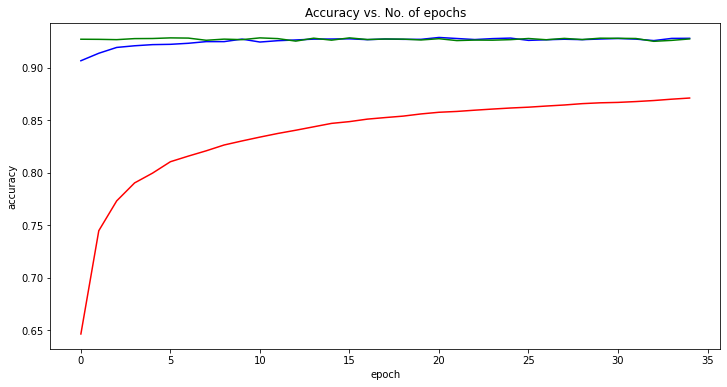

In [49]:
acc_sgd = [result['val_acc'] for result in his]
acc_adam = [result['val_acc'] for result in his_adam]
acc_adamw = [result['val_acc'] for result in his_adamw]

plt.figure(figsize=(12,6))

plt.plot(acc_sgd, 'r')
plt.plot(acc_adam, 'b')
plt.plot(acc_adamw, 'g')


plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs')

Text(0.5, 1.0, 'Loss vs. No. of epochs')

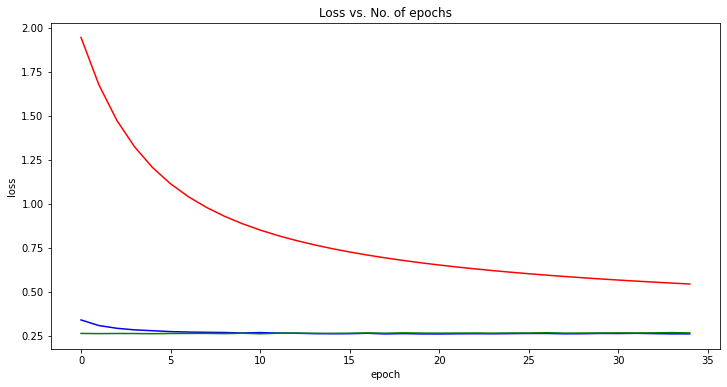

In [52]:
acc_sgd = [result['val_loss'] for result in his]
acc_adam = [result['val_loss'] for result in his_adam]
acc_adamw = [result['val_loss'] for result in his_adamw]

plt.figure(figsize=(12,6))

plt.plot(acc_sgd, 'r')
plt.plot(acc_adam, 'b')
plt.plot(acc_adamw, 'g')


plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs')

# Predict

In [19]:
def predict_image(img, model):
    x = img.unsqueeze(0)
    y = model(x)
    _, preds = torch.max(y, dim=1)
    return preds[0].item()

In [37]:
label_list = []
prediction_list = []

for i in range(len(val)):
    img, label = val[i]
    # plt.imshow(img[0], cmap='gray')
    
    prediction =  predict_image(img, model)
    
    print('Label:', label, ', Predicted:', prediction)
    
    label_list.append(label)
    prediction_list.append(prediction)

Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 8 , Predicted: 9
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 7 , Predicted: 9
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 1 , Predi

Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 5 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 8 , Predicted: 5
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 2 , Predi

Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 6 , Predi

Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 2 , Predicted: 5
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 4 , Predi

Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 6 , Predicted: 5
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 3 , Predicted: 9
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 1 , Predi

Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 8 , Predicted: 8
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 1 , Predicted: 4
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 8 , Predicted: 2
Label: 5 , Predi

Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 3 , Predicted: 8
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 5 , Predicted: 9
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 3 , Predicted: 2
Label: 1 , Predicted: 1
Label: 9 , Predicted: 7
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 9 , Predicted: 7
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 3 , Predi

Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 2 , Predicted: 3
Label: 3 , Predicted: 3
Label: 7 , Predicted: 5
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 1 , Predi

Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 8 , Predicted: 5
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 9 , Predi

Label: 3 , Predicted: 3
Label: 7 , Predicted: 4
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 3 , Predicted: 8
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 4 , Predicted: 9
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 3 , Predicted: 7
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 4 , Predi

Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 2 , Predicted: 8
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 4 , Predicted: 6
Label: 4 , Predicted: 4
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predi

Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 1 , Predicted: 7
Label: 9 , Predicted: 9
Label: 8 , Predicted: 8
Label: 4 , Predicted: 8
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 6 , Predicted: 5
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 3 , Predicted: 2
Label: 7 , Predicted: 7
Label: 9 , Predicted: 4
Label: 2 , Predicted: 2
Label: 9 , Predi

Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 3 , Predicted: 2
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 3 , Predicted: 2
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 2 , Predicted: 3
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 6 , Predicted: 0
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 6 , Predi

Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 9 , Predicted: 4
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 8 , Predicted: 0
Label: 3 , Predicted: 3
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 5 , Predicted: 3
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 5 , Predicted: 3
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 2 , Predicted: 4
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 7 , Predi

Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 1 , Predicted: 5
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 3 , Predicted: 7
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 4 , Predicted: 4
Label: 7 , Predicted: 4
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 8 , Predicted: 8
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 3 , Predi

Label: 8 , Predicted: 0
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 7 , Predicted: 9
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 3 , Predicted: 9
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 1 , Predicted: 3
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 8 , Predicted: 4
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 0 , Predicted: 8
Label: 7 , Predicted: 7
Label: 7 , Predi

Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 6 , Predicted: 5
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 9 , Predi

Label: 1 , Predicted: 1
Label: 5 , Predicted: 8
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 0 , Predicted: 8
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 3 , Predicted: 2
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 9 , Predicted: 4
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 3 , Predi

Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 8 , Predicted: 1
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 5 , Predi

Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 3 , Predicted: 9
Label: 9 , Predicted: 9
Label: 4 , Predicted: 9
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 2 , Predicted: 8
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 9 , Predicted: 7
Label: 8 , Predicted: 8
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 0 , Predicted: 5
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 8 , Predi

Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 2 , Predicted: 3
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 3 , Predicted: 2
Label: 0 , Predicted: 0
Label: 4 , Predicted: 6
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 4 , Predi

Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 6 , Predicted: 6
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 3 , Predicted: 3
Label: 2 , Predicted: 4
Label: 3 , Predicted: 3
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 2 , Predicted: 2
Label: 1 , Predicted: 1
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 8 , Predi

Label: 9 , Predicted: 9
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 8 , Predicted: 2
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 3 , Predicted: 5
Label: 4 , Predicted: 4
Label: 5 , Predicted: 5
Label: 8 , Predicted: 8
Label: 5 , Predicted: 5
Label: 4 , Predicted: 4
Label: 8 , Predicted: 8
Label: 8 , Predicted: 8
Label: 1 , Predicted: 9
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 9 , Predicted: 9
Label: 1 , Predicted: 1
Label: 4 , Predicted: 9
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 8 , Predicted: 8
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 4 , Predicted: 5
Label: 4 , Predicted: 4
Label: 0 , Predi

Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 7 , Predicted: 9
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 6 , Predicted: 6
Label: 0 , Predicted: 0
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 0 , Predicted: 0
Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 2 , Predicted: 2
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 8 , Predicted: 8
Label: 3 , Predicted: 3
Label: 1 , Predicted: 1
Label: 2 , Predi

Label: 6 , Predicted: 6
Label: 7 , Predicted: 7
Label: 1 , Predicted: 1
Label: 3 , Predicted: 5
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 7 , Predicted: 7
Label: 5 , Predicted: 5
Label: 7 , Predicted: 9
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 0 , Predicted: 0
Label: 5 , Predicted: 5
Label: 6 , Predicted: 6
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 1 , Predicted: 1
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 6 , Predicted: 6
Label: 5 , Predicted: 8
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 8 , Predicted: 5
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 2 , Predicted: 4
Label: 1 , Predicted: 1
Label: 1 , Predicted: 1
Label: 3 , Predicted: 3
Label: 5 , Predicted: 5
Label: 2 , Predicted: 2
Label: 1 , Predi

Label: 0 , Predicted: 0
Label: 2 , Predicted: 2
Label: 5 , Predicted: 5
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 7 , Predicted: 7
Label: 3 , Predicted: 3
Label: 2 , Predicted: 2
Label: 3 , Predicted: 7
Label: 4 , Predicted: 4
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 0 , Predicted: 0
Label: 8 , Predicted: 8
Label: 9 , Predicted: 9
Label: 3 , Predicted: 3
Label: 6 , Predicted: 2
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 2 , Predicted: 2
Label: 2 , Predicted: 2
Label: 0 , Predicted: 0
Label: 3 , Predicted: 5
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 7 , Predicted: 7
Label: 9 , Predicted: 9
Label: 9 , Predicted: 9
Label: 5 , Predicted: 5
Label: 5 , Predicted: 5
Label: 0 , Predicted: 0
Label: 7 , Predicted: 7
Label: 4 , Predicted: 4
Label: 3 , Predicted: 3
Label: 4 , Predicted: 4
Label: 4 , Predicted: 4
Label: 6 , Predicted: 6
Label: 1 , Predicted: 1
Label: 0 , Predicted: 0
Label: 3 , Predicted: 3
Label: 7 , Predi

In [42]:
def test_accuracy(pred, label):
    count = 0    
    for i in range(len(pred)):
        if label[i] != pred[i]:
            count +=1 
    return count

print('Accuracy in test dataset: ', (len(prediction_list) - test_accuracy(prediction_list, label_list))/len(prediction_list))

Accuracy in test dataset:  0.9296
